<a href="https://colab.research.google.com/github/SolemnShark871/Churn/blob/main/Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the data

In [2]:
# !pip install pandas-profiling==2.7.1

## General packages
import pandas as pd
import numpy as np
import os
import math
from google.colab import drive
from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import scipy
import scipy.stats as stats
from sklearn.decomposition import PCA

In [3]:
drive.mount('/content/drive', force_remount= True)
os.chdir('/content/drive/MyDrive/Churn') #Thomas & Favio & Juan

os.listdir("./")

Mounted at /content/drive


['personas_retiradas.csv',
 'non_retired_people.csv',
 'retired_people.csv',
 'Datasets_Churn.ipynb',
 'ML models.ipynb',
 'Images',
 'Copy of Spotify challenge.ipynb',
 'not_scaled_not_pca_merged.csv',
 'pca_merged_scaled.csv',
 'not_scaled_not_lambda_merged.csv',
 'LogReg.ipynb',
 'SVM_Model.ipynb',
 'NN model.ipynb',
 'Data_exploration.ipynb']

In [4]:
#Importing the datasets for retired and non retired people
df_retired =  pd.read_csv("retired_people.csv", index_col = False)
df_non_retired = pd.read_csv("non_retired_people.csv", index_col = False)
#Statistical description database
df_retired.describe()

,PERSONA,AC_TP,ADM_TP,AI_TP,AP_TP,CO_TP,CU_TP,GC_TP,HD_TP,IN_TP,LI_TP,NE_TP,OP_TP,PD_TP,PM_TP,PR_TP,RE_TP,SE_TP,SM_TP,SO_TP,TD_TP,ASIGNACIONES_FACTURADAS,ASIGNACIONES_NO_FACTURADAS,AC_HR,ADM_HR,AI_HR,AP_HR,CO_HR,CU_HR,GC_HR,HD_HR,IN_HR,LI_HR,NE_HR,OP_HR,PD_HR,PM_HR,PR_HR,RE_HR,SE_HR,...,AP_PN,CO_PN,CU_PN,GC_PN,HD_PN,IN_PN,LI_PN,NE_PN,OP_PN,PD_PN,PM_PN,PR_PN,RE_PN,SE_PN,SM_PN,SO_PN,TD_PN,AC_RS,ADM_RS,AI_RS,AP_RS,CO_RS,CU_RS,GC_RS,HD_RS,IN_RS,LI_RS,NE_RS,OP_RS,PD_RS,PM_RS,PR_RS,RE_RS,SE_RS,SM_RS,SO_RS,TD_RS,EDAD,GENERO,TIEMPO_EMP
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.0,1126.000000,1126.000000,1126.0,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.0,1126.000000,1126.000000,1126.000000,1126.0,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.0,1126.000000,1126.000000,1126.0,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.0,1126.000000,...,1126.000000,1126.000000,1126.0,1126.0,1126.000000,1126.000000,1126.0,1126.000000,1126.000000,1126.000000,1126.000000,1126.0,1126.0,1126.000000,1126.000000,1126.000000,1126.0,1126.0,1126.000000,1126.0,1126.000000,1126.000000,1126.0,1126.0,1126.0,1126.000000,1126.0,1126.000000,1126.000000,1126.000000,1126.000000,1126.0,1126.0,1126.000000,1126.000000,1126.000000,1126.0,1126.000000,1126.000000,1126.000000
mean,1325.170515,0.078153,15.776199,0.002664,2.299290,0.669627,0.001776,0.0,0.000888,0.119893,0.0,0.293073,2.023091,0.056838,0.865897,0.027531,0.0,0.055950,2.011545,0.396980,0.0,4.437833,12.333037,0.923153,386.349689,0.479352,265.829254,19.367771,0.013321,0.0,0.062904,11.098703,0.0,39.943348,282.600977,6.092478,21.511696,0.164298,0.0,5.732469,...,31.611012,0.180284,0.0,0.0,0.000888,2.952043,0.0,2.011545,17.189165,0.312611,1.883659,0.0,0.0,0.119005,26.136767,0.436945,0.0,0.0,0.132327,0.0,8.522202,0.080817,0.0,0.0,0.0,0.476021,0.0,0.211368,2.547957,0.134991,0.024867,0.0,0.0,0.007105,6.198046,0.150089,0.0,30.338366,0.277087,20.012433
std,537.627315,0.443343,36.067266,0.066613,5.099032,2.938042,0.059602,0.0,0.029801,0.630213,0.0,1.669940,6.127780,0.454471,2.392721,0.215296,0.0,0.447686,4.406747,2.666258,0.0,7.393159,36.144526,20.927342,582.041751,13.737356,473.087094,84.740759,0.447015,0.0,2.110805,70.488901,0.0,229.491505,529.029573,51.966258,97.796808,2.462177,0.0,57.326197,...,91.472117,2.389310,0.0,0.0,0.029801,20.908083,0.0,18.898862,60.110600,2.579227,10.823832,0.0,0.0,1.294107,72.573671,4.898891,0.0,0.0,0.763200,0.0,25.845368,1.218249,0.0,0.0,0.0,4.170036,0.0,1.795227,9.431433,1.218189,0.284884,0.0,0.0,0.111328,18.301059,2.910156,0.0,8.473650,0.447759,26.811868
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,-1.000000,0.000000,-78.000000
25%,941.250000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000,43.625000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,25.000000,0.000000,4.000000
50%,1299.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0

In [5]:
#Statistical description database
df_non_retired.describe()

,PERSONA,AC_TP,ADM_TP,AI_TP,AP_TP,CO_TP,CU_TP,GC_TP,HD_TP,IN_TP,LI_TP,NE_TP,OP_TP,PD_TP,PM_TP,PR_TP,RE_TP,SE_TP,SM_TP,SO_TP,TD_TP,ASIGNACIONES_FACTURADAS,ASIGNACIONES_NO_FACTURADAS,AC_HR,ADM_HR,AI_HR,AP_HR,CO_HR,CU_HR,GC_HR,HD_HR,IN_HR,LI_HR,NE_HR,OP_HR,PD_HR,PM_HR,PR_HR,RE_HR,SE_HR,...,AP_PN,CO_PN,CU_PN,GC_PN,HD_PN,IN_PN,LI_PN,NE_PN,OP_PN,PD_PN,PM_PN,PR_PN,RE_PN,SE_PN,SM_PN,SO_PN,TD_PN,AC_RS,ADM_RS,AI_RS,AP_RS,CO_RS,CU_RS,GC_RS,HD_RS,IN_RS,LI_RS,NE_RS,OP_RS,PD_RS,PM_RS,PR_RS,RE_RS,SE_RS,SM_RS,SO_RS,TD_RS,EDAD,GENERO,TIEMPO_EMP
count,594.00000,594.000000,594.000000,594.000000,594.000000,594.0,594.0,594.0,594.000000,594.000000,594.0,594.000000,594.000000,594.000000,594.000000,594.0,594.0,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.0,594.0,594.0,594.000000,594.000000,594.0,594.000000,594.000000,594.000000,594.000000,594.0,594.0,594.000000,...,594.000000,594.0,594.0,594.0,594.000000,594.000000,594.0,594.000000,594.000000,594.000000,594.000000,594.0,594.0,594.0,594.000000,594.00000,594.000000,594.0,594.000000,594.0,594.000000,594.0,594.0,594.0,594.000000,594.0,594.0,594.000000,594.000000,594.000000,594.0,594.0,594.0,594.0,594.000000,594.0,594.0,594.000000,594.000000,594.000000
mean,1874.87037,0.077441,15.574074,0.052189,2.020202,0.0,0.0,0.0,0.018519,0.265993,0.0,0.250842,0.996633,0.230640,1.489899,0.0,0.0,0.207071,1.360269,0.553872,0.015152,4.035354,6.247475,0.203434,376.182593,4.890286,282.329343,0.0,0.0,0.0,0.895926,21.058603,0.0,37.307205,170.901751,25.627239,21.203923,0.0,0.0,10.642862,...,64.084175,0.0,0.0,0.0,0.018519,0.548822,0.0,1.398990,13.902357,0.323232,0.227273,0.0,0.0,0.0,72.723906,0.36532,0.015152,0.0,0.080808,0.0,11.321549,0.0,0.0,0.0,0.030303,0.0,0.0,0.400673,1.314815,0.021886,0.0,0.0,0.0,0.0,7.984848,0.0,0.0,32.478114,0.289562,30.846801
std,665.87710,0.344648,11.441267,0.342055,4.196232,0.0,0.0,0.0,0.168298,1.340744,0.0,1.520864,3.955484,1.060881,4.720598,0.0,0.0,1.697896,3.162518,4.373918,0.292871,7.103696,7.583667,1.243262,563.172417,41.257902,473.575643,0.0,0.0,0.0,12.902608,141.463419,0.0,189.618523,458.441515,150.042697,82.708761,0.0,0.0,107.852373,...,149.269191,0.0,0.0,0.0,0.168298,3.176931,0.0,8.633091,48.762914,3.584193,2.731466,0.0,0.0,0.0,181.594218,2.94346,0.292871,0.0,0.538753,0.0,26.004461,0.0,0.0,0.0,0.270701,0.0,0.0,2.608405,5.852621,0.234882,0.0,0.0,0.0,0.0,20.863358,0.0,0.0,9.028923,0.453941,47.775985
min,6.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-1.000000,0.000000,-2.000000
25%,1401.25000,0.000000,4.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,30.125000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,26.000000,0.000000,2.000000
50%,2058.50000,0.000000,17.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,142.745000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.330000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00

## Data exploration

In [6]:
#Analysis empty columns
list_retired = []
for column in df_retired.columns:
  if df_retired[column].any() == False:
    list_retired.append(column)


list_non_retired = []
for column in df_non_retired.columns:
  if df_non_retired[column].any() == False:
    list_non_retired.append(column)
    
print('Retired: ', len(list_retired), ' Non retired: ', len(list_non_retired))

Retired:  277  Non retired:  341


### Technologies subset

In [7]:
#Common empty columns for technologies
common_lists = []
for i in list_retired:
    if i in list_non_retired:
        common_lists.append(i)

index0 = common_lists.index('Alibaba')
index1 = common_lists.index('iOS / Swift')
print((index1 - index0)/(165), 'ratio of empty columns')

0.7393939393939394 ratio of empty columns


In [8]:
#Columns technologies without empty values
df_tech_nr = df_non_retired[df_non_retired.columns[43:208]]
df_tech_nr = df_tech_nr.loc[:, (df_tech_nr != 0).any(axis = 0)]
df_tech_nr.describe()

,.NET,.NET Core,ANGULAR,AWS,Activemq,Android / Java,Angular,Azure,Azure DevOps,BOOTSTRAP,BUSINESS OBJECTS,C#,C++,CLOUDERA,Cloudera,Cobol,Drupal,ECLIPSE,EXCEL,FLUTTER,FORMS,FORMS 3.0,GIT,Ionic / Angular,JBPM,JEE,Java,Java JSF,Java Spring Boot,Javascript,Jboss Fuse-ESB,KOTLIN,MICROSOFT PROJECT,Microsoft Azure,MySQL,NODE JS,NO_APLICA,Next.Js,ORACLE,ORACLE 11,ORACLE DB,Oracle Forms,PL/SQL,Power Builder,PowerBI,Python,React,React Native,SAS,SPRING BOOT,SQL,SQL DEVELOPER,SQL SERVER
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,0.601010,0.225589,1.451178,0.314815,0.139731,0.021886,0.265993,0.149832,0.015152,0.363636,0.077441,0.077441,0.063973,0.011785,0.013468,0.220539,0.175084,0.111111,0.013468,0.057239,0.685185,0.001684,0.444444,0.106061,0.074074,0.483165,1.217172,0.262626,0.072391,0.220539,0.139731,0.040404,0.013468,0.144781,0.220539,0.308081,0.624579,0.106061,0.803030,0.420875,0.030303,0.013468,1.020202,0.220539,0.030303,0.025253,0.198653,0.139731,0.052189,0.643098,0.001684,0.013468,0.528620
std,1.548779,0.715724,2.931219,0.997577,0.754305,0.167893,0.837539,0.927075,0.168635,1.391042,0.407430,0.407430,0.352225,0.158606,0.129158,0.843694,0.938039,0.896561,0.192140,0.353384,1.783440,0.041030,1.114572,0.881052,0.399706,1.247143,2.464242,0.956940,0.515996,0.843694,0.754305,0.304631,0.192140,0.580092,0.843694,1.237839,4.271811,0.881052,2.778487,1.213180,0.294567,0.115365,2.493755,0.843694,0.392713,0.268093,0.682915,0.754305,0.505254,1.586376,0.041030,0.216877,1.446058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20.000000,5.000000,26.000000,9.000000,1

In [9]:
#Columns technologies without empty values
df_tech_r = df_retired[df_retired.columns[43:208]]
df_tech_r = df_tech_r.loc[:, (df_tech_r != 0).any(axis = 0)]
df_tech_r.describe()

,.NET,.NET Core,ANGULAR,AWS,Activemq,Android / Java,Angular,Azure,BOOTSTRAP,BUSINESS OBJECTS,C#,C++,CLOUDERA,Cloudera,Cobol,DAX,Drupal,ECLIPSE,FLUTTER,FORMS,FORMS 3.0,GIT,Ionic / Angular,JBPM,JEE,Java,Java JSF,Java Spring Boot,Javascript,Jboss Fuse-ESB,Microsoft Azure,MySQL,NODE JS,NO_APLICA,Next.Js,ODI,ODV,ORACLE,ORACLE 11,ORACLE 8I,ORACLE 9I,ORACLE DB,PL/SQL,Power Builder,PowerBI,Python,React,React Native,SAS,SPRING BOOT,SQL DEVELOPER,SQL SERVER
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.00000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000
mean,1.075488,0.006217,0.482238,0.046181,0.025755,0.002664,0.01421,0.002664,0.022202,0.008881,0.008881,0.008881,0.009769,0.053286,0.012433,0.037300,0.044405,0.241563,0.049734,0.301954,0.214032,0.059503,0.001776,0.047957,1.737123,0.375666,0.017762,0.031083,0.012433,0.025755,0.007993,0.012433,0.024867,1.935169,0.001776,0.127886,0.048845,0.957371,0.047957,0.724689,0.069272,0.035524,1.894316,0.012433,0.079041,0.063055,0.009769,0.025755,0.005329,0.145648,0.111901,0.208703
std,2.952149,0.089226,1.822122,0.275840,0.202766,0.066613,0.15712,0.066613,0.211754,0.111200,0.111200,0.111200,0.136276,0.411828,0.151514,0.301748,0.383875,1.331430,0.361743,1.143614,1.261892,0.453150,0.059602,0.339163,4.077710,1.369540,0.172935,0.222934,0.151514,0.202766,0.107199,0.151514,0.229596,4.679247,0.059602,1.339182,0.406955,2.897962,0.344365,3.101061,0.446813,0.324659,4.914778,0.151514,0.514644,0.440730,0.115056,0.202766,0.111427,0.750771,0.820786,0.854767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,2.000000,24.000000,3.000000,3.000000,2.000000,3.00000,2.000000,4.000000,2.0000

### Stages subset

In [10]:
#Etapas with empty columns
index0 = common_lists.index('ADMCAP')
index1 = common_lists.index('VAR')
print((index1 - index0)/(374), 'ratio of empty columns')

0.20320855614973263 ratio of empty columns


In [11]:
print(common_lists)

['GC_TP', 'LI_TP', 'RE_TP', 'GC_HR', 'LI_HR', 'RE_HR', 'Alibaba', 'Android / Kotlin', 'Apache Airflow', 'Apache Aries - Blueprint', 'Apache Camel', 'Apache NiFi', 'Apache Spark', 'Apex', 'Appium', 'Atlassian', 'BIZAGI', 'BOOTSRAO', 'BPEL', 'Biztalk', 'Bootstrap', 'Bulma', 'C# ASP.Net', 'C# MVC', 'C# Net Core', 'C# Net Framework', 'C# Razor', 'C# WCF', 'CCS', 'CISCO', 'COBIT', 'Circle CI', 'DELPHI', 'ETHEREUM', 'Espresso', 'Flexbox', 'Flutter / Dart', 'Foundation', 'Gatsby', 'Go Beego', 'Go Buffalo', 'Go Gin Gonic', 'Go Mango', 'Go Martini', 'Google App Builder', 'Google Cloud', 'HTML_x', 'HYPERLEDGER FABRIC', 'Heroku', 'IBM Cloud', 'IBM Integration Bus', 'Ionic / React', 'Ionic / Vue', 'J2ME', 'JMeter', 'Java ADF', 'Java Dropwizard', 'Java Grails', 'Java Hibernate', 'Java Jboss Seam', 'Java Spring MVC', 'Jenkins', 'Joomla', 'Jquery', 'Katalon Studio', 'Kobiton', 'LESS', 'LambdaTest', 'MICRONAUT', 'Materialize CSS', 'MicroFocus UFT', 'Native Script', 'Node.Js', 'OBIEE', 'OSB', 'OWB', 'O

### Areas subset

In [12]:
#Areas with empty columns
index0 = common_lists.index('1')
index1 = common_lists.index('63')
print((index1 - index0)/(44), 'ratio of empty columns')

0.7272727272727273 ratio of empty columns


In [13]:
#Columns areas without empty columns
df_area_nr = df_non_retired[df_non_retired.columns[586:631]]
df_area_nr = df_area_nr.loc[:, (df_area_nr != 0).any(axis = 0)]
df_area_nr.describe()

,TIMU,TRCAP,TRCON,TRIBUT,TRINS,TRINSM,TRMIG,TRREV,VAC,VENPRO,VISCLI,6,8,31,35,41
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,0.866936,1.423249,2.451448,0.408670,3.596330,0.005051,1.010067,2.378249,48.660774,0.026094,0.312155,0.193783,0.265289,0.250124,0.260716,0.226957
std,3.870368,8.108861,12.190883,9.960153,17.400495,0.123091,9.926067,29.824722,63.225164,0.543000,4.248963,4.722903,6.465654,6.096059,6.354204,5.531424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,51.500000,118.500000,159.000000,242.750000,220.500000,3.000000,206.000000,700.000000,520.000000,13.000000,88.500000,115.107143,157.581667,148.573846,154.865385,134.812500


In [14]:
df_area_r = df_retired[df_retired.columns[586:630]]
df_area_r = df_area_r.loc[:, (df_area_r != 0).any(axis = 0)]
df_area_r.describe()

,TIMU,TRCAP,TRCON,TRIBUT,TRINS,TRINSM,TRINT,TRMIG,TRREV,VAC,VENPRO,VISCLI,7,9,28,45
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000
mean,3.977078,4.555968,5.769689,0.003552,5.806252,0.309503,0.016874,0.945897,1.560799,46.702487,0.712860,3.124600,0.507327,0.225411,0.192668,0.190348
std,17.616208,26.134998,30.516208,0.119204,30.419086,5.761280,0.375564,7.324660,16.391677,55.369995,11.617551,29.287883,17.023820,7.563866,6.465161,6.387307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.937500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,303.500000,506.200000,582.550000,4.000000,782.500000,141.000000,11.000000,141.000000,458.420000,320.000000,305.500000,465.050000,571.250000,253.812500,216.944444,214.332000


### Visualizations

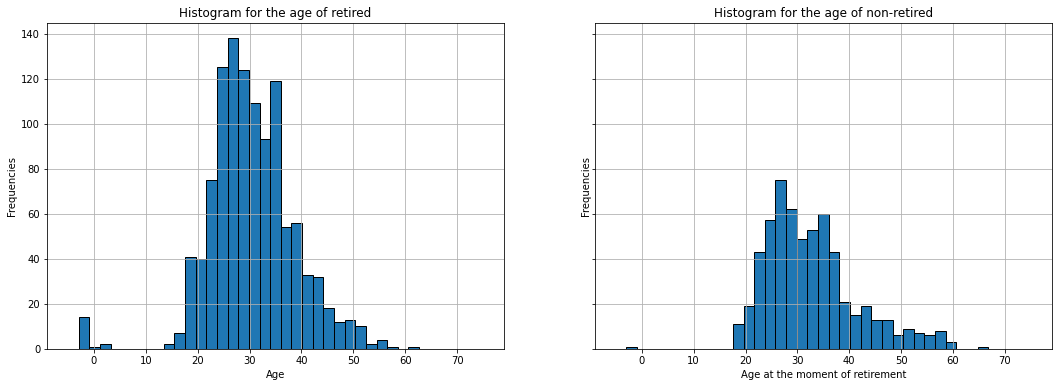

In [15]:
#Histograms for age
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = 'col', sharey = 'row', figsize = (18, 6))
bins = np.linspace(-5, 75, 40)

df_non_retired['EDAD'].hist(bins = bins, ax = ax[1], ec = 'black')
ax[1].set_title('Histogram for the age of non-retired')
ax[1].set_xlabel('Age at the moment of retirement')
ax[1].set_ylabel('Frequencies')

df_retired['EDAD'].hist(bins = bins, ax = ax[0], ec = 'black')
ax[0].set_title('Histogram for the age of retired')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequencies')
plt.show()

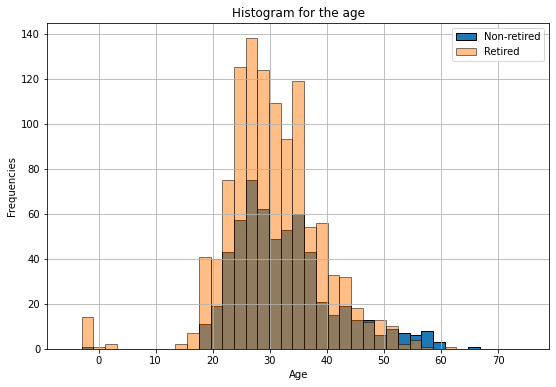

In [16]:
#Histograms v2 for age
fig, ax = plt.subplots(nrows = 1, ncols = 1, sharex = 'col', sharey = 'row', figsize = (9, 6))
bins = np.linspace(-5, 75, 40)

df_non_retired['EDAD'].hist(bins = bins, ax = ax, ec = 'black', histtype = 'bar')

df_retired['EDAD'].hist(bins = bins, ax = ax, alpha = 0.5, ec = 'black', histtype = 'bar')
ax.set_title('Histogram for the age')
ax.set_xlabel('Age')
ax.set_ylabel('Frequencies')
plt.legend(['Non-retired', 'Retired'], loc = 'best')
plt.show()

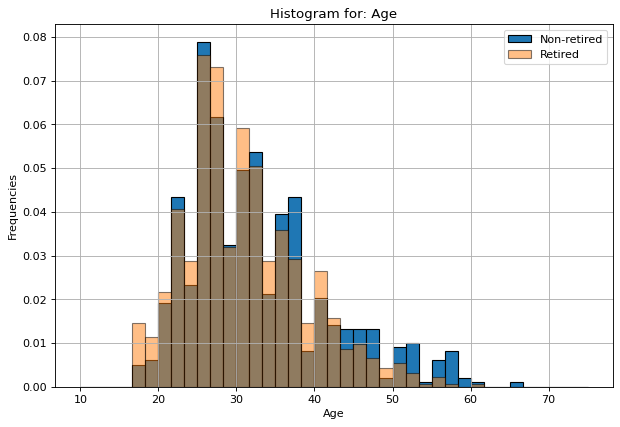

In [17]:
#Erasing ages below 16 years
df_non_retired = df_non_retired[df_non_retired['EDAD'] > 16]
df_retired = df_retired[df_retired['EDAD'] > 16]

#Normalise the values and plot the histogram
def normalised_hist(df_1, df_2, column: str, feature: str, xlimits: list):
    #Normalisation
    #normalised_1 = df_1[column].div(df_1[column].value_counts().max())
    #normalised_2 = df_2[column].div(df_2[column].value_counts().max())

    #Histogram
    fig, ax = plt.subplots(nrows = 1, ncols = 1, sharex = 'col', sharey = 'row', figsize = (9, 6), dpi = 80)
    bins = np.linspace(xlimits[0], xlimits[1], 40)

    df_1[column].hist(bins = bins, ax = ax, ec = 'black', histtype = 'bar', density = True)

    df_2[column].hist(bins = bins, ax = ax, alpha = 0.5, ec = 'black', histtype = 'bar', density = True)
    
    ax.set_title(f'Histogram for: {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequencies')
    
    plt.legend(['Non-retired', 'Retired'], loc = 'best')
    plt.show()

#Call the function
normalised_hist(df_non_retired, df_retired, 'EDAD', 'Age', [10, 75])

In [18]:
#Gender evaluation
print("Non-retired")
print(df_non_retired['GENERO'].value_counts())
print('------------------------------')
print("Retired")
print(df_retired['GENERO'].value_counts())

Non-retired
0    421
1    172
Name: GENERO, dtype: int64
------------------------------
Retired
0    801
1    306
Name: GENERO, dtype: int64


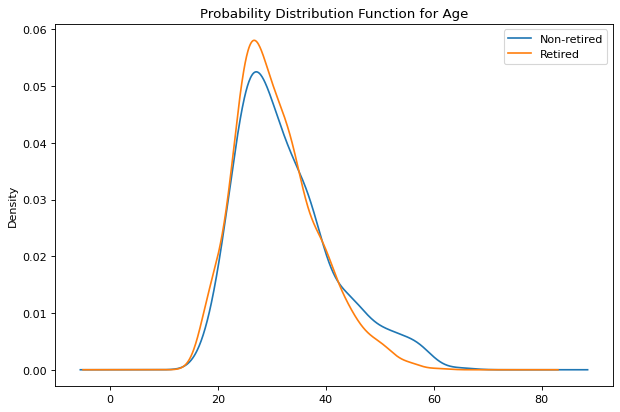

In [19]:
plt.figure(dpi = 80, figsize = (9, 6))
df_non_retired['EDAD'].plot.density(title = 'Probability Distribution Function for Age', label = "Non-retired")
df_retired['EDAD'].plot.density(title = 'Probability Distribution Function for Age', label = "Retired")
plt.legend()
plt.show()

### Modelling using Normal distributions

#### Age

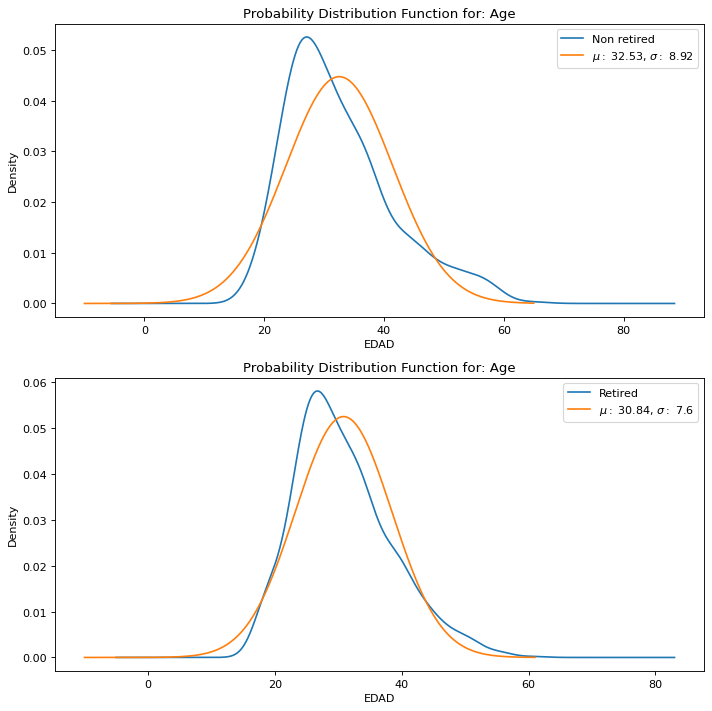

In [20]:
# We want to predict the normal distribution that could have generated this
def loglik_norm(data, theta):
    '''compute log-likelihood of observations
    how likely is this data *under the assumption*
    that these parameters are set'''
    return -np.sum(stats.norm(theta[0], np.abs(theta[1])).logpdf(data))

def likelihood_plot(df, column, df_name, name):
  thetas = []
  data_series = df[column]
  # compute the log-likelihood for this specific dataset
  loglik = lambda theta, data = data_series: loglik_norm(data, theta)    
  # MLE optimise
  theta = scipy.optimize.minimize(loglik, [1.0, 1.0], tol = 1e-5).x
  thetas.append(theta)
  #print(f"Inferred statistics for {df_name},{name}:")
  
  # compare with using the direct estimates of these parameters
  mu = theta[0]
  sigma = theta[1]
  x = np.linspace(-10, max(df[column]), 10000) #make this general

  df[column].plot.density(title = f'Probability Distribution Function for: {name}', label = f"{df_name}")
  plt.xlabel(f'{column}')
  plt.plot(x, stats.norm.pdf(x, mu, sigma),label = f"$\mu:$ {round(theta[0],2)}, $\sigma:$ {round(theta[1],2)}")
  plt.legend()

#Call the function
fig = plt.figure(dpi = 80, figsize= (9,9))
plt.subplot(2,1,1)
likelihood_plot(df_non_retired, 'EDAD', "Non retired", "Age")
plt.subplot(2,1,2)
likelihood_plot(df_retired, 'EDAD', "Retired", "Age")
fig.tight_layout()

#### Time in the company

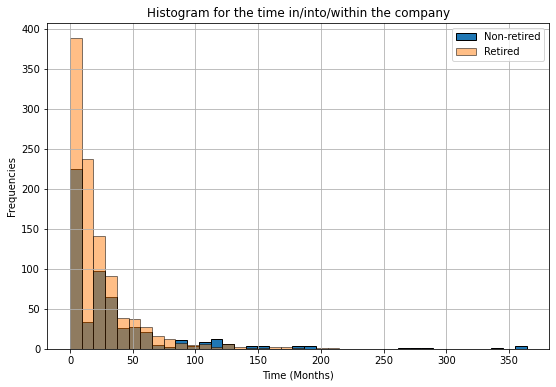

In [21]:
#Histograms v2 for time in the company
fig, ax = plt.subplots(nrows = 1, ncols = 1, sharex = 'col', sharey = 'row', figsize = (9, 6))
bins = np.linspace(0, max(df_non_retired['TIEMPO_EMP']), 40)

df_non_retired['TIEMPO_EMP'].hist(bins = bins, ax = ax, ec = 'black', histtype = 'bar')

df_retired['TIEMPO_EMP'].hist(bins = bins, ax = ax, alpha = 0.5, ec = 'black', histtype = 'bar')
ax.set_title('Histogram for the time in/into/within the company')
ax.set_xlabel('Time (Months)')
ax.set_ylabel('Frequencies')
plt.legend(['Non-retired', 'Retired'], loc = 'best')
plt.show()

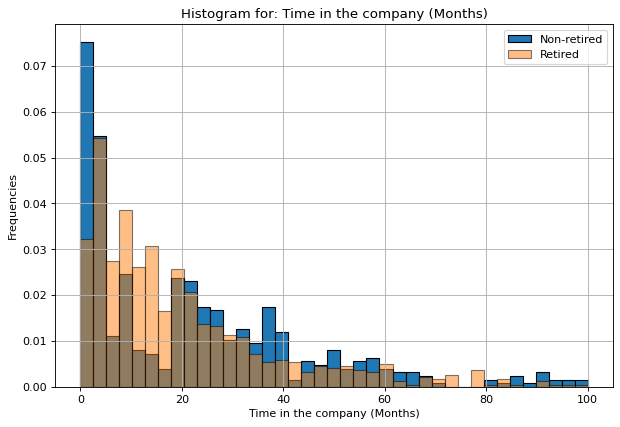

In [22]:
#Call the function
df_non_retired = df_non_retired[df_non_retired['TIEMPO_EMP'] > 0]
df_retired = df_retired[df_retired['TIEMPO_EMP'] > 0]
normalised_hist(df_non_retired, df_retired, 'TIEMPO_EMP', 'Time in the company (Months)', [0, 100])

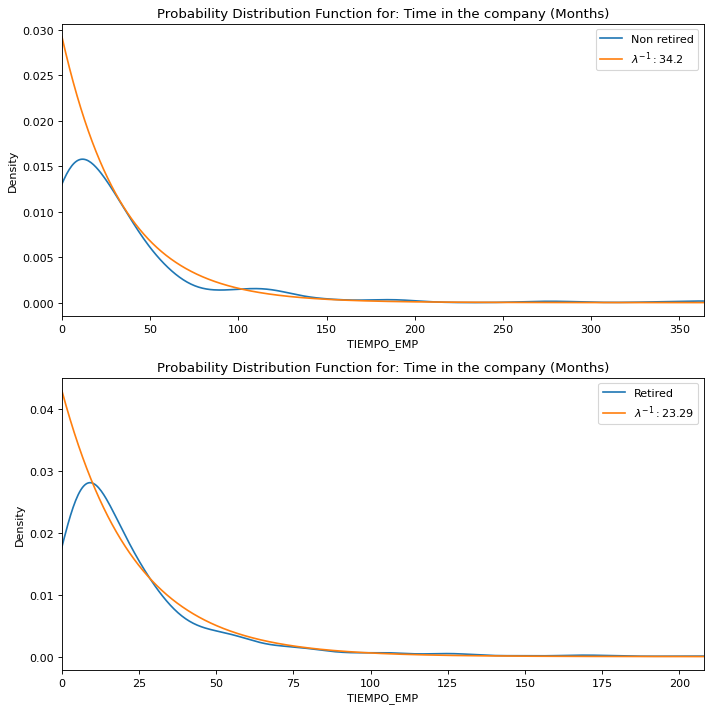

In [23]:
#We want to predict the exponential distribution that could have generated this
def loglik_exp(data, theta):
    '''compute log-likelihood of observations
    how likely is this data *under the assumption*
    that these parameters are set'''
    return -np.sum(stats.expon(scale = theta).logpdf(data))

def likelihood_plot_exp(df, column, df_name, name):
  data_series = df[column]
  # compute the log-likelihood for this specific dataset
  loglik = lambda theta, data = data_series: loglik_exp(data, theta)    
  # MLE optimise
  theta = scipy.optimize.minimize(loglik, 1.0, tol = 1e-10).x
  #print(f"Inferred statistics for {df_name},{name}:")
  
  # compare with using the direct estimates of these parameters
  gamma = theta[0]
  x = np.linspace(0, max(df[column]), 10000) #make this general

  df[column].plot.density(title = f'Probability Distribution Function for: {name}', label = f"{df_name}")
  plt.xlabel(f'{column}')
  plt.plot(x, (1/gamma)*np.exp(-x*(1/gamma)), label = "$\lambda^{-1}:$" + f"{round(gamma,2)}")
  plt.xlim(0, max(df[column]))
  #plt.yscale('log')
  #plt.ylim((10e-7, 10e-2))
  plt.legend()

# Call the function
fig = plt.figure(dpi = 80, figsize= (9,9))

plt.subplot(2,1,1)
likelihood_plot_exp(df_non_retired, 'TIEMPO_EMP', "Non retired", "Time in the company (Months)")
plt.subplot(2,1,2)
likelihood_plot_exp(df_retired, 'TIEMPO_EMP', "Retired", "Time in the company (Months)")
fig.tight_layout() 

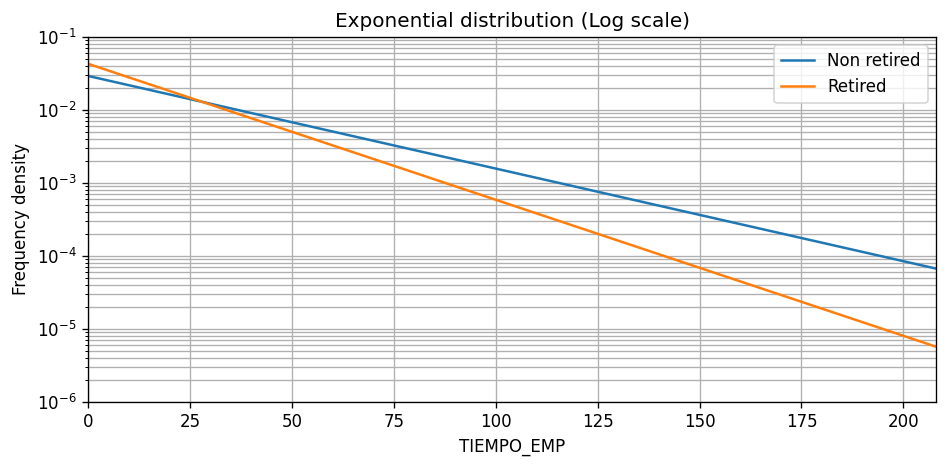

In [24]:
#We want to predict the exponential distribution that could have generated this
def loglik_exp(data, theta):
    '''compute log-likelihood of observations
    how likely is this data *under the assumption*
    that these parameters are set'''
    return -np.sum(stats.expon(scale = theta).logpdf(data))

def likelihood_log_plot_exp(df, column, df_name, name):
  data_series = df[column]
  # compute the log-likelihood for this specific dataset
  loglik = lambda theta, data = data_series: loglik_exp(data, theta)    
  # MLE optimise
  theta = scipy.optimize.minimize(loglik, 1.0, tol = 1e-10).x
  #print(f"Inferred statistics for {df_name},{name}:")
  
  # compare with using the direct estimates of these parameters
  gamma = theta[0]
  x = np.linspace(0, max(df[column]), 10000) #make this general
  
  plt.xlabel(f'{column}')
  plt.ylabel('Frequency density')
  plt.title('Exponential distribution (Log scale)')
  plt.plot(x, (1/gamma)*np.exp(-x*(1/gamma)), label = f"{df_name}")
  plt.grid(True, which = 'both', ls = '-')
  plt.xlim(0, max(df[column]))
  plt.ylim((10e-7, 10e-2))
  plt.yscale('log')
  plt.legend()

# Call the function
fig = plt.figure(dpi = 120, figsize= (8, 4))
likelihood_log_plot_exp(df_non_retired, 'TIEMPO_EMP', "Non retired", "Time in the company (Months)")
likelihood_log_plot_exp(df_retired, 'TIEMPO_EMP', "Retired", "Time in the company (Months)")
fig.tight_layout()

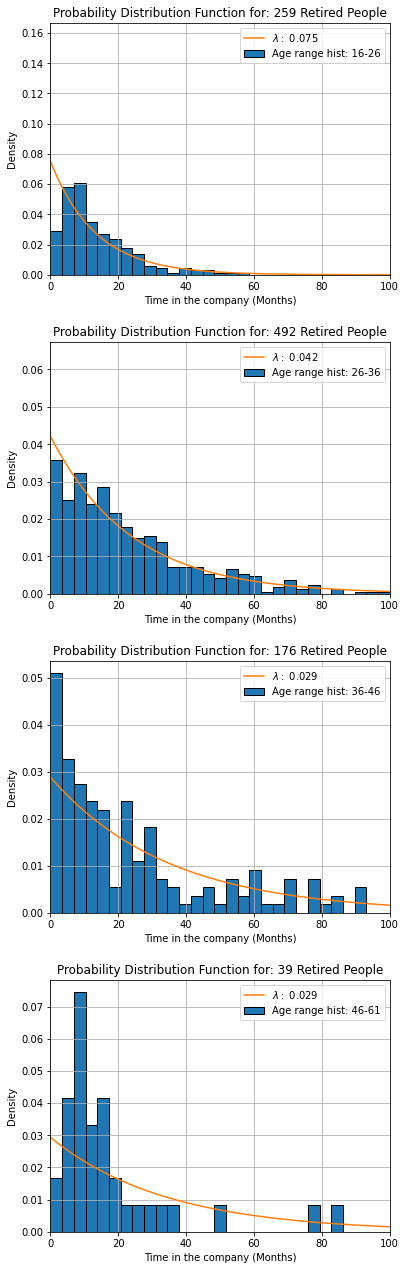

In [25]:
#Plots the MLE for a window of age
def win_likelihood_plot(df, column, df_name, window_size):
  '''Segmenting the data base on windows of age'''
  #Local variables
  data_series = pd.DataFrame()
  dict_lambda = dict()
  offset = 16
  is_last = False
  i = 0

  #PART 1: Filling the new columns with the data depending on the window size
  #Creating the columns of the dataframe for each window age range
  while not is_last:
      i += 1
      upper_limit = i*window_size + offset
      lower_limit = (i - 1)*window_size + offset

      if (i*window_size + offset) <= max(df['EDAD']):
        data_series[f'WINDOW_{i}'] = df[column].where(((df['EDAD'] >= lower_limit) & (df['EDAD'] < upper_limit)))
        dict_lambda[f'WINDOW_{i}'] = [lower_limit, upper_limit]
      
      else:
        data_series[f'WINDOW_{i}'] = df[column].where(((df['EDAD'] >= lower_limit) & (df['EDAD'] <= max(df['EDAD']))))
        num_last_bin = data_series[f'WINDOW_{i}'].dropna().shape[0] #count the number of people in the last window
        if not data_series[f'WINDOW_{i}'].dropna().empty:
          if num_last_bin <= 20:
            #Put it to the previous bin 
            data_series[f'WINDOW_{i - 1}'].append(data_series[f'WINDOW_{i}'])
            data_series.drop(f'WINDOW_{i}', axis = 1, inplace = True)
            dict_lambda[f'WINDOW_{i - 1}'] = [(i - 2)*window_size + offset, max(df['EDAD'])]
          
          else:
            dict_lambda[f'WINDOW_{i}'] = [lower_limit, max(df['EDAD'])]

        else:
            data_series.drop(f'WINDOW_{i}', axis = 1, inplace = True)
            
        is_last = True
  

  #PART 2: MLE procedure for each column of the data_series corresponding to each window of age
  gamma = []
  # compute the log-likelihood for this specific dataset
  for col in data_series.columns:
    window = data_series[col].dropna()
    loglik = lambda theta, data = window: loglik_exp(data, theta) 
    # MLE optimise
    theta = scipy.optimize.minimize(loglik, 1.0, tol = 1e-10).x
    # compare with using the direct estimates of these parameters
    gamma.append(theta[0])
    # dictionary to save the lambda parameter with the respective age ranges
    dict_lambda[col].append(gamma[-1])


  #PART 3: Making the subplots for the specific age ranges
  x = np.linspace(-10, max(df[column]), 10000)

  fig, ax = plt.subplots(nrows = data_series.shape[1], ncols = 1, figsize = (6, 18))
  for i in range(1, data_series.shape[1] + 1):
    window = data_series[f'WINDOW_{i}'].dropna()
    num_people = window.shape[0]

    lower_age = (i - 1)*window_size + offset
    upper_age = (i*window_size + offset) if (i*window_size + offset) <= max(df['EDAD']) and data_series.columns[-1] != window.name else max(df['EDAD'])
    j = i - 1

    window.hist(ax = ax[j], bins = np.linspace(0, 100, 30), ec = 'black', histtype = 'bar',
                density = True, label = f'Age range hist: {lower_age}-{upper_age}')
    #window.plot.density(ax = ax[j])
    ax[j].plot(x, (1/gamma[j])*np.exp(-x*(1/gamma[j])), label = f"$\lambda:$ {round(1/gamma[j], 3)}")
    ax[j].set_xlim(0, 100)
    ax[j].set_title(f'Probability Distribution Function for: {num_people} {df_name} People')
    ax[j].set_xlabel('Time in the company (Months)')
    ax[j].set_ylabel('Density')
    plt.tight_layout(pad = 2)
    ax[j].legend()

  return dict_lambda

# Call the function
dict_lambda_R = win_likelihood_plot(df_retired, 'TIEMPO_EMP', "Retired", 10)

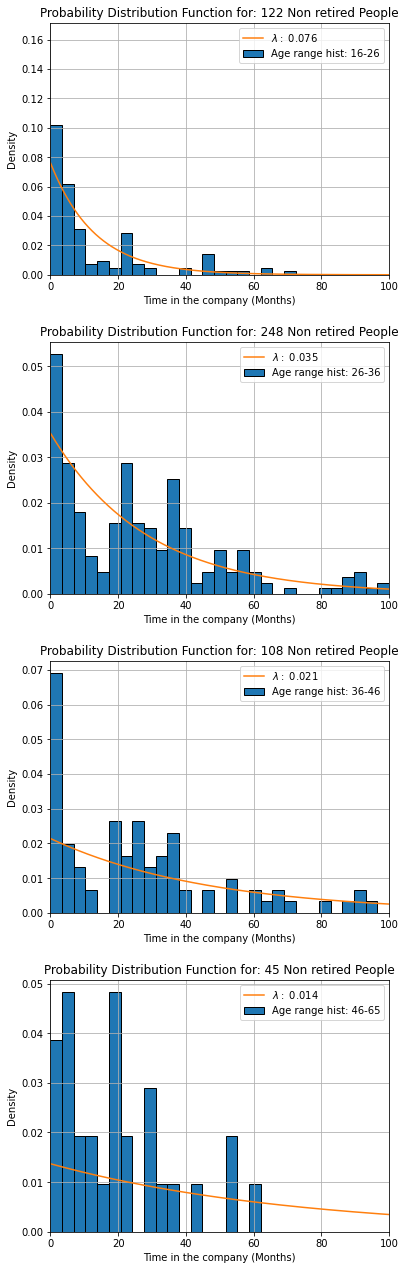

In [26]:
dict_lambda_NR = win_likelihood_plot(df_non_retired, 'TIEMPO_EMP', "Non retired", 10)

### Adding $\lambda$ 

In [27]:
#Adding the lambda parameter as a new column of the dataset
df_retired['LAMBDA'] = 0
df_non_retired['LAMBDA'] = 0
length_dict = len(dict_lambda_R.keys()) if len(dict_lambda_R.keys()) >= len(dict_lambda_NR.keys()) else len(dict_lambda_NR.keys())
count = 0

for i, j in zip(dict_lambda_R.values(), dict_lambda_NR.values()):
    count += 1
    if count < length_dict:
        df_retired['LAMBDA'] = np.where((df_retired['EDAD'] >= i[0]) & (df_retired['EDAD'] < i[1]), i[2], df_retired['LAMBDA'])
        df_non_retired['LAMBDA'] = np.where((df_non_retired['EDAD'] >= j[0]) & (df_non_retired['EDAD'] < j[1]), j[2], df_non_retired['LAMBDA'])
    else:
        df_retired['LAMBDA'] = np.where((df_retired['EDAD'] >= i[0]) & (df_retired['EDAD'] <= i[1]), i[2], df_retired['LAMBDA'])
        df_non_retired['LAMBDA'] = np.where((df_non_retired['EDAD'] >= j[0]) & (df_non_retired['EDAD'] <= j[1]), j[2], df_non_retired['LAMBDA'])

print("Retired Lambda^-1")
print(df_retired['LAMBDA'].value_counts())
print("---------------------------")
print("Non-retired Lambda^-1")
df_non_retired['LAMBDA'].value_counts()

Retired Lambda^-1
23.737822    492
13.335903    259
34.636348    176
34.076924     42
Name: LAMBDA, dtype: int64
---------------------------
Non-retired Lambda^-1


28.338715    248
13.122964    122
46.694458    108
72.978026     59
Name: LAMBDA, dtype: int64

In [28]:
# Dealing with the 0 lambda values
#df_retired['LAMBDA'].where(df_retired['LAMBDA'] == 0).dropna()
df_retired[df_retired['LAMBDA'] == 0] #Leidy 

,PERSONA,AC_TP,ADM_TP,AI_TP,AP_TP,CO_TP,CU_TP,GC_TP,HD_TP,IN_TP,LI_TP,NE_TP,OP_TP,PD_TP,PM_TP,PR_TP,RE_TP,SE_TP,SM_TP,SO_TP,TD_TP,ASIGNACIONES_FACTURADAS,ASIGNACIONES_NO_FACTURADAS,AC_HR,ADM_HR,AI_HR,AP_HR,CO_HR,CU_HR,GC_HR,HD_HR,IN_HR,LI_HR,NE_HR,OP_HR,PD_HR,PM_HR,PR_HR,RE_HR,SE_HR,...,CO_PN,CU_PN,GC_PN,HD_PN,IN_PN,LI_PN,NE_PN,OP_PN,PD_PN,PM_PN,PR_PN,RE_PN,SE_PN,SM_PN,SO_PN,TD_PN,AC_RS,ADM_RS,AI_RS,AP_RS,CO_RS,CU_RS,GC_RS,HD_RS,IN_RS,LI_RS,NE_RS,OP_RS,PD_RS,PM_RS,PR_RS,RE_RS,SE_RS,SM_RS,SO_RS,TD_RS,EDAD,GENERO,TIEMPO_EMP,LAMBDA


In [29]:
df_non_retired[df_non_retired['LAMBDA'] == 0]

,PERSONA,AC_TP,ADM_TP,AI_TP,AP_TP,CO_TP,CU_TP,GC_TP,HD_TP,IN_TP,LI_TP,NE_TP,OP_TP,PD_TP,PM_TP,PR_TP,RE_TP,SE_TP,SM_TP,SO_TP,TD_TP,ASIGNACIONES_FACTURADAS,ASIGNACIONES_NO_FACTURADAS,AC_HR,ADM_HR,AI_HR,AP_HR,CO_HR,CU_HR,GC_HR,HD_HR,IN_HR,LI_HR,NE_HR,OP_HR,PD_HR,PM_HR,PR_HR,RE_HR,SE_HR,...,CO_PN,CU_PN,GC_PN,HD_PN,IN_PN,LI_PN,NE_PN,OP_PN,PD_PN,PM_PN,PR_PN,RE_PN,SE_PN,SM_PN,SO_PN,TD_PN,AC_RS,ADM_RS,AI_RS,AP_RS,CO_RS,CU_RS,GC_RS,HD_RS,IN_RS,LI_RS,NE_RS,OP_RS,PD_RS,PM_RS,PR_RS,RE_RS,SE_RS,SM_RS,SO_RS,TD_RS,EDAD,GENERO,TIEMPO_EMP,LAMBDA


## Data cleaning

In [30]:
#Drop empty columns
common_lists #list of columns that are all 0's for 

df_retired.drop(columns = common_lists, inplace = True)

df_retired.head()

,PERSONA,AC_TP,ADM_TP,AI_TP,AP_TP,CO_TP,CU_TP,HD_TP,IN_TP,NE_TP,OP_TP,PD_TP,PM_TP,PR_TP,SE_TP,SM_TP,SO_TP,TD_TP,ASIGNACIONES_FACTURADAS,ASIGNACIONES_NO_FACTURADAS,AC_HR,ADM_HR,AI_HR,AP_HR,CO_HR,CU_HR,HD_HR,IN_HR,NE_HR,OP_HR,PD_HR,PM_HR,PR_HR,SE_HR,SM_HR,SO_HR,TD_HR,.NET,.NET Core,ANGULAR,...,8,9,28,31,35,41,45,56,59,AC_PN,ADM_PN,AI_PN,AP_PN,CO_PN,HD_PN,IN_PN,NE_PN,OP_PN,PD_PN,PM_PN,SE_PN,SM_PN,SO_PN,TD_PN,ADM_RS,AP_RS,CO_RS,HD_RS,IN_RS,NE_RS,OP_RS,PD_RS,PM_RS,SE_RS,SM_RS,SO_RS,EDAD,GENERO,TIEMPO_EMP,LAMBDA
0,7,0,11,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,1,6,0.0,28.00,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,2256.00,0,0,0,0,...,0,0.0000,0.000000,0,0,0,0.000,0.0,0.0,0,261,0,0,0,0,0,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,181,34.076924
1,9,1,57,0,4,5,0,0,0,0,2,0,1,0,0,1,3,0,4,63,0.0,929.00,0.0,172.5,225.0,0,0.0,0.0,0.0,684.5,0.0,16.00,0.0,0.0,3.5,0.00,0,1,0,0,...,0,253.8125,0.000000,0,0,0,0.000,0.0,0.0,0,607,0,23,0,0,0,0,0,0,0,0,0,8,0,4,13,0,0,0,0,0,0,0,0,0,0,44,1,136,34.636348
2,12,0,23,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,1,4,0.0,2172.39,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,26.33,0.0,0.0,0.0,0.00,0,0,0,1,...,0,0.0000,0.000000,0,0,0,0.000,0.0,0.0,0,1141,0,39,0,0,0,0,0,0,1,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,39,0,175,34.636348
3,28,0,28,0,9,6,0,0,0,0,5,0,0,0,0,18,0,0,19,45,0.0,195.50,0.0,573.5,33.0,0,0.0,0.0,0.0,107.5,0.0,0.00,0.0,0.0,1043.0,0.00,0,6,0,0,...,0,0.0000,216.944444,0,0,0,0.000,0.0,0.0,0,848,0,88,0,0,0,0,7,0,0,0,199,0,0,0,8,0,0,0,0,11,0,0,0,95,0,38,0,114,34.636348
4,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,1929.43,0.0,0.0,0.0,0,0.0,0.0,0.0,2.5,0.0,9.00,0.0,0.0,0.0,199.39,0,0,0,0,...,0,0.0000,0.000000,0,0,0,214.332,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,0,166,34.636348


In [31]:
df_non_retired.drop(columns = common_lists, inplace = True)

df_non_retired.head()

,PERSONA,AC_TP,ADM_TP,AI_TP,AP_TP,CO_TP,CU_TP,HD_TP,IN_TP,NE_TP,OP_TP,PD_TP,PM_TP,PR_TP,SE_TP,SM_TP,SO_TP,TD_TP,ASIGNACIONES_FACTURADAS,ASIGNACIONES_NO_FACTURADAS,AC_HR,ADM_HR,AI_HR,AP_HR,CO_HR,CU_HR,HD_HR,IN_HR,NE_HR,OP_HR,PD_HR,PM_HR,PR_HR,SE_HR,SM_HR,SO_HR,TD_HR,.NET,.NET Core,ANGULAR,...,8,9,28,31,35,41,45,56,59,AC_PN,ADM_PN,AI_PN,AP_PN,CO_PN,HD_PN,IN_PN,NE_PN,OP_PN,PD_PN,PM_PN,SE_PN,SM_PN,SO_PN,TD_PN,ADM_RS,AP_RS,CO_RS,HD_RS,IN_RS,NE_RS,OP_RS,PD_RS,PM_RS,SE_RS,SM_RS,SO_RS,EDAD,GENERO,TIEMPO_EMP,LAMBDA
0,6,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15,0.0,805.75,0.0,0.00,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,0,0,0,...,0.000000,0,0,0.000000,0.000000,0.0,0,0,0,0,2011,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,59,0,364,72.978026
1,8,1,15,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,11,0.0,945.49,0.0,0.00,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,0,0,0,...,157.581667,0,0,0.000000,0.000000,0.0,0,0,0,0,536,0,0,0,0,0,0,0,0,18,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,41,1,182,46.694458
2,21,0,29,1,10,0,0,0,0,0,0,0,5,0,0,25,0,0,21,13,0.0,214.25,0.0,365.49,0,0,0.0,0.00,0.0,0.0,0.0,50.5,0,0.0,1428.25,0.00,0.0,4,4,14,...,0.000000,0,0,0.000000,0.000000,0.0,0,0,0,0,2066,0,214,0,0,0,0,0,0,0,0,1575,0,0,0,58,0,0,0,0,0,0,0,0,224,0,40,0,192,46.694458
3,31,0,21,0,5,0,0,0,0,0,0,0,2,0,0,14,0,0,13,8,0.0,190.74,0.0,111.16,0,0,0.0,0.00,0.0,0.0,0.0,1.0,0,0.0,1628.56,0.00,0.0,0,0,11,...,0.000000,0,0,148.573846,0.000000,0.0,0,0,0,0,1253,0,236,0,0,0,0,0,0,0,0,847,0,0,0,48,0,0,0,0,0,0,0,0,172,0,46,0,147,72.978026
4,35,0,20,0,1,0,0,0,1,0,2,0,1,0,0,4,39,0,41,7,0.0,795.50,0.0,6.50,0,0,0.0,43.75,0.0,6.0,0.0,1.5,0,0.0,94.92,1065.08,0.0,0,0,4,...,0.000000,0,0,0.000000,154.865385,0.0,0,0,0,0,1287,0,17,0,0,0,0,30,0,0,0,228,36,0,0,5,0,0,0,0,0,0,0,0,62,0,58,0,364,72.978026


## Statistical Analysis

In [32]:
df_10 = df_retired[df_retired.columns[1:11]]

feature_correlation = df_10.corr()
feature_correlation.style.background_gradient(cmap='coolwarm')

,AC_TP,ADM_TP,AI_TP,AP_TP,CO_TP,CU_TP,HD_TP,IN_TP,NE_TP,OP_TP
AC_TP,1.000000,0.127700,-0.008065,0.096369,0.120050,0.603349,-0.006009,-0.038471,0.008238,0.055700
ADM_TP,0.127700,1.000000,0.003856,0.235106,0.275057,0.077030,0.007350,0.017318,0.044809,0.058061
AI_TP,-0.008065,0.003856,1.000000,0.013295,-0.010649,-0.001387,-0.001387,-0.008877,-0.008161,-0.008847
AP_TP,0.096369,0.235106,0.013295,1.000000,0.237181,0.037659,0.245809,0.212895,0.173457,0.310116
CO_TP,0.120050,0.275057,-0.010649,0.237181,1.000000,0.022654,-0.007934,-0.050792,-0.034292,0.031747
CU_TP,0.603349,0.077030,-0.001387,0.037659,0.022654,1.000000,-0.001033,-0.006614,-0.006080,0.003235
HD_TP,-0.006009,0.007350,-0.001387,0.245809,-0.007934,-0.001033,1.000000,0.325691,0.119278,0.199750
IN_TP,-0.038471,0.017318,-0.008877,0.212895,-0.050792,-0.006614,0.325691,1.000000,0.201417,0.185662
NE_TP,0.008238,0.044809,-0.008161,0.173457,-0.034292,-0.006080,0.119278,0.201417,1.000000,0.321560
OP_TP,0.055700,0.058061,-0.008847,0.310116,0.031747,0.003235,0.199750,0.185662,0.321560,1.000000


In [33]:
# # Loop idea for retired people 
# count = 0 

# for col1 in df_retired.columns:
#   for col2 in df_retired.columns:
#     if col1 == col2:
#       pass
#     else:
#       corr = df_retired[col1].corr(df_retired[col2])
#       if abs(corr) >= 0.9:
#         print(f'{col1} is correlated with {col2} with a correlation of {corr}')
#         count += 1

# print(count/2)

In [34]:
#Checking correlated columns
print(df_retired['SEGCONT'].value_counts())
df_retired['EJEPLA'].value_counts()

0.0       959
2.0         2
1611.0      1
10.5        1
12.0        1
15.5        1
6.0         1
1.0         1
3.0         1
20.0        1
Name: SEGCONT, dtype: int64


0    968
2      1
Name: EJEPLA, dtype: int64

In [43]:
# Creating the labels for both datasets 0 for non retired and 1 for retired people
df_retired['LABEL'] = 1
df_non_retired['LABEL'] = 0
print(df_retired['LABEL'].value_counts())
df_non_retired['LABEL'].value_counts()

1    969
Name: LABEL, dtype: int64


0    537
Name: LABEL, dtype: int64

In [49]:
#Standarising the data with mean 0 and std 1
#standarise the retired and non retired datasets together

df_retired_nonretired = pd.concat([df_retired, df_non_retired], join = 'inner', ignore_index = True)

df_retired_nonretired_scaled = df_retired_nonretired.drop(['PERSONA', 'LABEL'], axis = 1)
cols_retired_nonretired = df_retired_nonretired_scaled.columns
df_retired_nonretired_scaled = StandardScaler().fit_transform(df_retired_nonretired_scaled)
df_retired_nonretired_scaled = pd.DataFrame(df_retired_nonretired_scaled, columns = cols_retired_nonretired)

df_retired_nonretired_scaled['PERSONA'] = df_retired_nonretired['PERSONA']
df_retired_nonretired_scaled['LABEL'] = df_retired_nonretired['LABEL']

df_retired_nonretired_scaled.describe()

,AC_TP,ADM_TP,AI_TP,AP_TP,CO_TP,CU_TP,HD_TP,IN_TP,NE_TP,OP_TP,PD_TP,PM_TP,PR_TP,SE_TP,SM_TP,SO_TP,TD_TP,ASIGNACIONES_FACTURADAS,ASIGNACIONES_NO_FACTURADAS,AC_HR,ADM_HR,AI_HR,AP_HR,CO_HR,CU_HR,HD_HR,IN_HR,NE_HR,OP_HR,PD_HR,PM_HR,PR_HR,SE_HR,SM_HR,SO_HR,TD_HR,.NET,.NET Core,ANGULAR,AWS,...,28,31,35,41,45,56,59,AC_PN,ADM_PN,AI_PN,AP_PN,CO_PN,HD_PN,IN_PN,NE_PN,OP_PN,PD_PN,PM_PN,SE_PN,SM_PN,SO_PN,TD_PN,ADM_RS,AP_RS,CO_RS,HD_RS,IN_RS,NE_RS,OP_RS,PD_RS,PM_RS,SE_RS,SM_RS,SO_RS,EDAD,GENERO,TIEMPO_EMP,LAMBDA,PERSONA,LABEL
count,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,...,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1506.000000,1506.000000
mean,-7.714060e-16,6.299373e-17,5.695791e-16,6.723263e-16,-3.248361e-15,-7.324542e-17,4.606209e-16,1.105984e-15,-1.373035e-16,7.371262e-16,1.644398e-15,8.367219e-17,2.014786e-15,-3.311686e-16,-1.088900e-15,-1.841525e-16,-8.417901e-17,5.349122e-16,-3.855555e-16,-3.855279e-16,1.506099e-16,-2.710868e-16,-9.288719e-17,-4.727515e-15,-7.795889e-17,-4.322664e-16,-2.888718e-16,3.258423e-17,1.327697e-15,1.019253e-15,-3.283488e-16,-6.823614e-16,-6.481646e-16,1.332857e-16,-1.676393e-16,7.125037e-17,1.306982e-15,-2.201832e-15,-3.879883e-16,-6.438335e-16,...,-1.157450e-16,3.419456e-16,3.419456e-16,3.376053e-16,-1.251397e-16,-1.247665e-16,-1.204216e-16,9.785131e-16,-1.547198e-16,4.557830e-16,5.698555e-16,2.550712e-16,4.606209e-16,1.016967e-16,-2.049231e-16,3.225249e-16,3.630157e-16,-2.636227e-16,-2.054576e-16,1.229502e-15,4.684905e-16,-8.417901e-17,-9.753523e-16,-7.144941e-16,8.793597e-16,-7.775984e-16,4.266360e-16,-2.867708e-16,9.403722e-16,2.886690e-16,3.870299e-17,-2.284398e-17,7.442770e-16,4.210794e-16,-1.812037e-16,2.016979e-16,-2.683408e-16,-6.723263e-16,1476.276892,0.643426
std,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,...,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,623.120425,0.479146
min,-2.002816e-01,-5.695550e-01,-1.010099e-01,-4.967394e-01,-1.958820e-01,-2.577696e-02,-7.307841e-02,-1.940407e-01,-1.838140e-01,-3.257513e-01,-1.718697e-01,-3.430455e-01,-1.103930e-01,-1.087889e-01,-4.797874e-01,-1.421600e-01,-3.249182e-02,-6.456243e-01,-3.692028e-01,-3.920327e-02,-7.249284e-01,-8.008866e

In [36]:
#Standarising the data with mean 0 and std 1
df_retired_scaled = df_retired.loc[:, df_retired.columns != 'PERSONA']
cols_retired = df_retired_scaled.columns
df_retired_scaled = StandardScaler().fit_transform(df_retired_scaled)
df_retired_scaled = pd.DataFrame(df_retired_scaled, columns = cols_retired)

df_retired_scaled.describe()

,AC_TP,ADM_TP,AI_TP,AP_TP,CO_TP,CU_TP,HD_TP,IN_TP,NE_TP,OP_TP,PD_TP,PM_TP,PR_TP,SE_TP,SM_TP,SO_TP,TD_TP,ASIGNACIONES_FACTURADAS,ASIGNACIONES_NO_FACTURADAS,AC_HR,ADM_HR,AI_HR,AP_HR,CO_HR,CU_HR,HD_HR,IN_HR,NE_HR,OP_HR,PD_HR,PM_HR,PR_HR,SE_HR,SM_HR,SO_HR,TD_HR,.NET,.NET Core,ANGULAR,AWS,...,8,9,28,31,35,41,45,56,59,AC_PN,ADM_PN,AI_PN,AP_PN,CO_PN,HD_PN,IN_PN,NE_PN,OP_PN,PD_PN,PM_PN,SE_PN,SM_PN,SO_PN,TD_PN,ADM_RS,AP_RS,CO_RS,HD_RS,IN_RS,NE_RS,OP_RS,PD_RS,PM_RS,SE_RS,SM_RS,SO_RS,EDAD,GENERO,TIEMPO_EMP,LAMBDA
count,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,969.0,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,969.0,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,...,969.0,9.690000e+02,9.690000e+02,969.0,969.0,969.0,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,969.0,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,969.0,9.690000e+02,9.690000e+02,9.690000e+02,969.0,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02,9.690000e+02
mean,1.143220e-15,-3.288850e-16,1.328343e-16,-1.112858e-15,-1.246280e-15,3.157805e-16,2.717841e-16,-6.369747e-16,-1.328487e-16,1.650039e-15,2.609425e-16,-1.531741e-15,-9.053645e-16,-4.950747e-16,1.122826e-15,4.891741e-16,0.0,5.889109e-16,1.564910e-15,3.501814e-16,-1.366869e-16,4.687513e-17,1.358849e-16,-8.675551e-16,3.212658e-16,2.809214e-16,-6.114247e-16,3.630280e-16,-1.392648e-16,-7.958317e-16,-3.367906e-16,-1.506936e-16,4.804092e-16,3.111833e-16,-5.590643e-16,0.0,-1.683094e-16,4.209739e-16,-1.172093e-15,-9.149888e-16,...,0.0,3.194899e-16,3.231562e-16,0.0,0.0,0.0,3.359169e-16,3.194469e-16,3.194469e-16,-1.513524e-16,-3.411444e-17,0.0,3.735116e-16,8.870900e-17,2.717841e-16,4.231221e-16,-2.063193e-16,-6.750992e-16,-7.236500e-16,5.339726e-16,2.632054e-16,-2.709677e-16,-3.071445e-16,0.0,-7.048026e-16,-1.507337e-15,5.965873e-16,0.0,-7.604569e-16,3.202346e-17,-1.039187e-16,5.747896e-16,2.150842e-16,5.001446e-16,-1.309009e-15,1.131562e-16,-3.826775e-17,6.347405e-17,-6.164087e-17,4.170497e-17
std,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,0.0,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,0.0,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,...,0.0,1.000516e+00,1.000516e+00,0.0,0.0,0.0,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,0.0,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,0.0,1.000516e+00,1.000516e+00,1.000516e+00,0.0,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00,1.000516e+00
min,-1.869574e-01,-4.765375e-01,-4.313980e-02,-4.936083e-01,-2.468381e-01,-3.214122e-02,-3.214122e-02,-2.057721e-01,-1.891762e-01,-3.579192e-01,-1.350475e-01,-3.944899e-01,-1.380905e-01,-1.349522e-01,-5.000908e-01,-1.583464e-01,0.0,-6.665758e-01,-3.691967e-01,-4.338392e-02,-7.280886e-01,-3.763520e-02,-6.166159e-01,-2.420423e-01,-3.214122e-02,-3.214122e-02,-1.700757e-01,-1.881148e-01,-5.872627e-01,-1.265777e-01,-2.381072e-01,-7.198983e-02,-1.079298e-01,-5.652740e-01,-1.919417e-01,0.0,-3.968255e-01,-7.516894e-02,-2.865215e-01,-1.7842

In [37]:
df_non_retired_scaled = df_non_retired.loc[:, df_non_retired.columns != 'PERSONA']
cols_non_retired = df_non_retired_scaled.columns
df_non_retired_scaled = StandardScaler().fit_transform(df_non_retired_scaled)
df_non_retired_scaled = pd.DataFrame(df_non_retired_scaled, columns = cols_non_retired)

df_non_retired_scaled.describe()

,AC_TP,ADM_TP,AI_TP,AP_TP,CO_TP,CU_TP,HD_TP,IN_TP,NE_TP,OP_TP,PD_TP,PM_TP,PR_TP,SE_TP,SM_TP,SO_TP,TD_TP,ASIGNACIONES_FACTURADAS,ASIGNACIONES_NO_FACTURADAS,AC_HR,ADM_HR,AI_HR,AP_HR,CO_HR,CU_HR,HD_HR,IN_HR,NE_HR,OP_HR,PD_HR,PM_HR,PR_HR,SE_HR,SM_HR,SO_HR,TD_HR,.NET,.NET Core,ANGULAR,AWS,...,8,9,28,31,35,41,45,56,59,AC_PN,ADM_PN,AI_PN,AP_PN,CO_PN,HD_PN,IN_PN,NE_PN,OP_PN,PD_PN,PM_PN,SE_PN,SM_PN,SO_PN,TD_PN,ADM_RS,AP_RS,CO_RS,HD_RS,IN_RS,NE_RS,OP_RS,PD_RS,PM_RS,SE_RS,SM_RS,SO_RS,EDAD,GENERO,TIEMPO_EMP,LAMBDA
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,537.0,537.0,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,537.0,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,537.0,537.0,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,537.0,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,...,5.370000e+02,537.0,537.0,5.370000e+02,5.370000e+02,5.370000e+02,537.0,537.0,537.0,537.0,5.370000e+02,5.370000e+02,5.370000e+02,537.0,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,537.0,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,537.0,5.370000e+02,537.0,5.370000e+02,5.370000e+02,5.370000e+02,537.0,537.0,5.370000e+02,537.0,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,1.024424e-16,-6.458728e-16,3.572561e-16,2.493350e-16,0.0,0.0,-3.678518e-16,2.945089e-16,9.386243e-17,-4.333384e-16,2.998843e-16,6.560033e-16,0.0,-4.531860e-16,-1.599176e-16,6.492841e-16,8.210378e-17,-1.695313e-17,6.119665e-17,-3.060866e-16,-4.300305e-17,1.752168e-17,-5.664825e-17,0.0,0.0,-1.228068e-16,3.820656e-16,1.206360e-16,-1.019255e-16,-1.632255e-16,-1.310766e-16,0.0,-1.835383e-16,-1.945475e-16,2.847918e-16,3.158812e-16,1.113531e-15,1.796618e-16,6.380164e-16,8.792884e-16,...,4.975587e-16,0.0,0.0,4.843270e-16,4.779179e-16,4.547108e-16,0.0,0.0,0.0,0.0,3.680069e-16,4.868338e-16,1.922733e-17,0.0,-3.678518e-16,-2.989539e-16,-5.654488e-17,7.988644e-16,-2.055567e-16,8.026892e-17,0.0,-5.851671e-16,5.351606e-16,8.210378e-17,-1.096578e-15,-3.185947e-16,0.0,-5.225491e-16,0.0,6.295399e-17,-6.029731e-16,-1.463241e-16,0.0,0.0,1.045512e-15,0.0,-2.687691e-17,-3.374086e-16,5.156231e-16,-2.356898e-16
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,0.0,0.0,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,0.0,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,0.0,0.0,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,0.0,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,...,1.000932e+00,0.0,0.0,1.000932e+00,1.000932e+00,1.000932e+00,0.0,0.0,0.0,0.0,1.000932e+00,1.000932e+00,1.000932e+00,0.0,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,0.0,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,0.0,1.000932e+00,0.0,1.000932e+00,1.000932e+00,1.000932e+00,0.0,0.0,1.000932e+00,0.0,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-2.371575e-01,-1.500542e+00,-1.608010e-01,-5.131279e-01,0.0,0.0,-1.158987e-01,-2.092702e-01,-1.738643e-01,-2.661205e-01,-2.294212e-01,-3.339980e-01,0.0,-1.284764e-01,-4.566306e-01,-1.326060e-01,-5.446449e-02,-6.081485e-01,-8.973037e-01,-1.724856e-01,-7.197838e-01,-1.248601e-01,-6.396864e-01,0.0,0.0,-7.311019e-02,-1.568807e-01,-2.075293e-01,-3.953366e-01,-1.800667e-01,-2.708067e-01,0.0,-1.039263e-01,-5.002614e-01,-1.699990e-01,-4.319342e-02,-4.117836e-01,-3.335419e-01,-5.280541e-01,-3.339584e-01,...,-4.319342e-02,0.0,0.0,-4.319342e-02,-4.319342e-02,-4.319342e-02,0.0,0.0,0.0,0.0,-1.308060e+00,-8.842981e-02,-4.564049e-01,0.0,-1.158987e-01,-1.821317e-01,-1.708155e-01,-3.014085e-01,-9.496929e-02,-8.761599e-02,0.0,-4.237367e-01,-1.307504e-01,-5.446449e-02,-1.580727e-01,-4.629679e-01,

In [53]:
#Split the scaled retired and non retired datasets
df_retired_nonretired_scaled.drop('PERSONA', inplace = True, axis = 1)
df_retired_scaled = df_retired_nonretired_scaled[df_retired_nonretired_scaled['LABEL'] == 1]
df_non_retired_scaled = df_retired_nonretired_scaled[df_retired_nonretired_scaled['LABEL'] == 0]

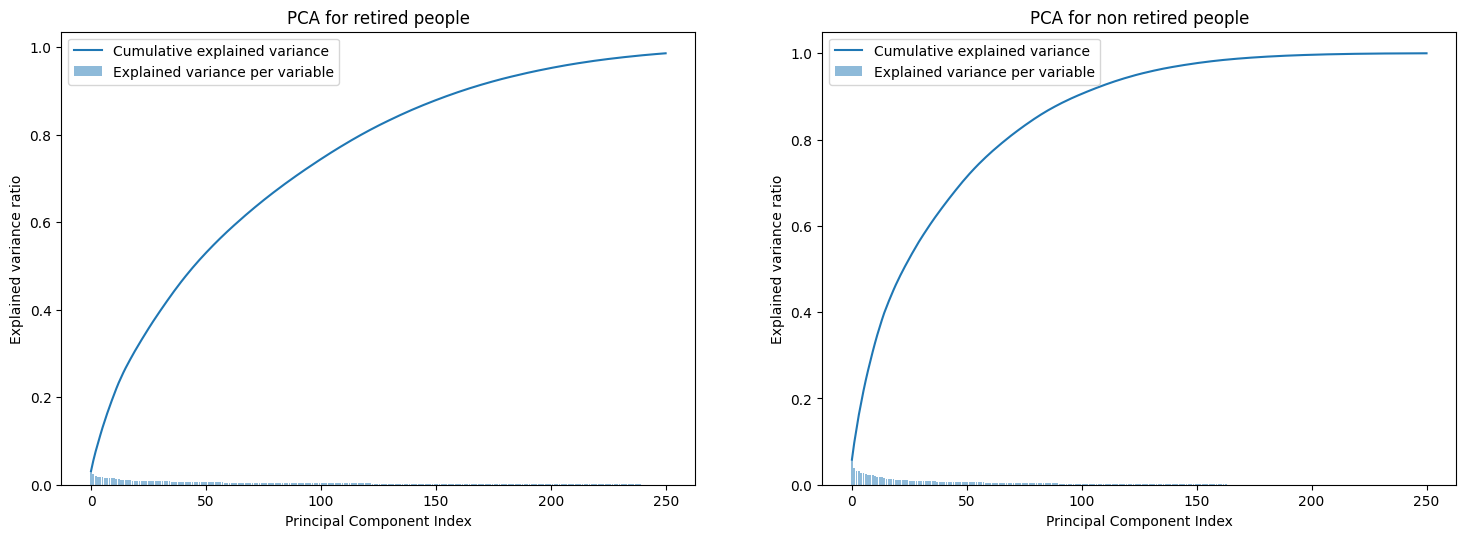

In [54]:
#Principal Component Analysis PCA
pca = PCA(n_components = 250)
pca_retired = pca.fit(df_retired_scaled.T)
exp_var_retired = pca_retired.explained_variance_ratio_
exp_var_cum_retired = np.cumsum(exp_var_retired)

pca_non_retired = pca.fit(df_non_retired_scaled.T)
exp_var_non_retired = pca_non_retired.explained_variance_ratio_
exp_var_cum_non_retired = np.cumsum(exp_var_non_retired)

#Explained variance plot
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6), dpi = 100)
ax[0].bar(np.linspace(0, len(exp_var_retired), len(exp_var_retired)), exp_var_retired, alpha = 0.5,
        align = 'center', label = 'Explained variance per variable')
ax[0].plot(np.linspace(0, len(exp_var_cum_retired), len(exp_var_cum_retired)), exp_var_cum_retired,
         label = 'Cumulative explained variance')
ax[0].set_xlabel('Principal Component Index')
ax[0].set_ylabel('Explained variance ratio')
ax[0].legend(loc = 'best')
ax[0].set_title('PCA for retired people')

ax[1].bar(np.linspace(0, len(exp_var_non_retired), len(exp_var_non_retired)), exp_var_non_retired, alpha = 0.5,
        align = 'center', label = 'Explained variance per variable')
ax[1].plot(np.linspace(0, len(exp_var_cum_non_retired), len(exp_var_cum_non_retired)), exp_var_cum_non_retired,
         label = 'Cumulative explained variance')
ax[1].set_xlabel('Principal Component Index')
ax[1].set_ylabel('Explained variance ratio')
ax[1].legend(loc = 'best')
ax[1].set_title('PCA for non retired people')
plt.show()

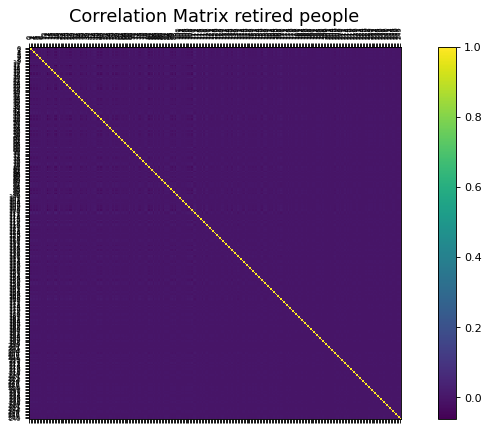

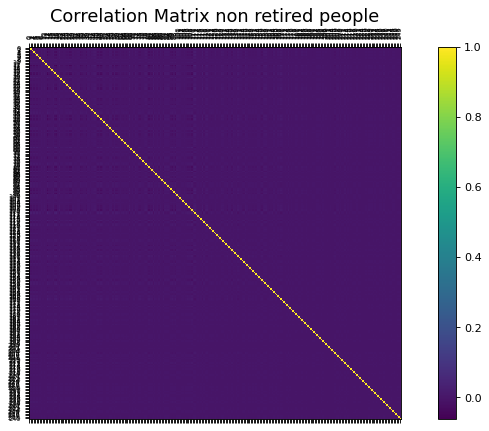

In [55]:
#Correlation matrices among principal components
corr_retired = np.corrcoef(pca_retired.components_)
df_corr = pd.DataFrame(corr_retired)

corr_non_retired = np.corrcoef(pca_non_retired.components_)
df_non_corr = pd.DataFrame(corr_non_retired)

fig = plt.figure(dpi = 80, figsize = (12, 6))
plt.matshow(df_corr, fignum = fig.number)
plt.xticks(range(df_corr.select_dtypes(['number']).shape[1]), df_corr.select_dtypes(['number']).columns, fontsize = 6, rotation = 90)
plt.yticks(range(df_corr.select_dtypes(['number']).shape[1]), df_corr.select_dtypes(['number']).columns, fontsize = 6)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 10)
plt.title('Correlation Matrix retired people', fontsize = 16)
plt.show()

fig = plt.figure(dpi = 80, figsize = (12, 6))
plt.matshow(df_non_corr, fignum = fig.number)
plt.xticks(range(df_non_corr.select_dtypes(['number']).shape[1]), df_non_corr.select_dtypes(['number']).columns, fontsize = 6, rotation = 90)
plt.yticks(range(df_non_corr.select_dtypes(['number']).shape[1]), df_non_corr.select_dtypes(['number']).columns, fontsize = 6)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 10)
plt.title('Correlation Matrix non retired people', fontsize = 16)
plt.show()

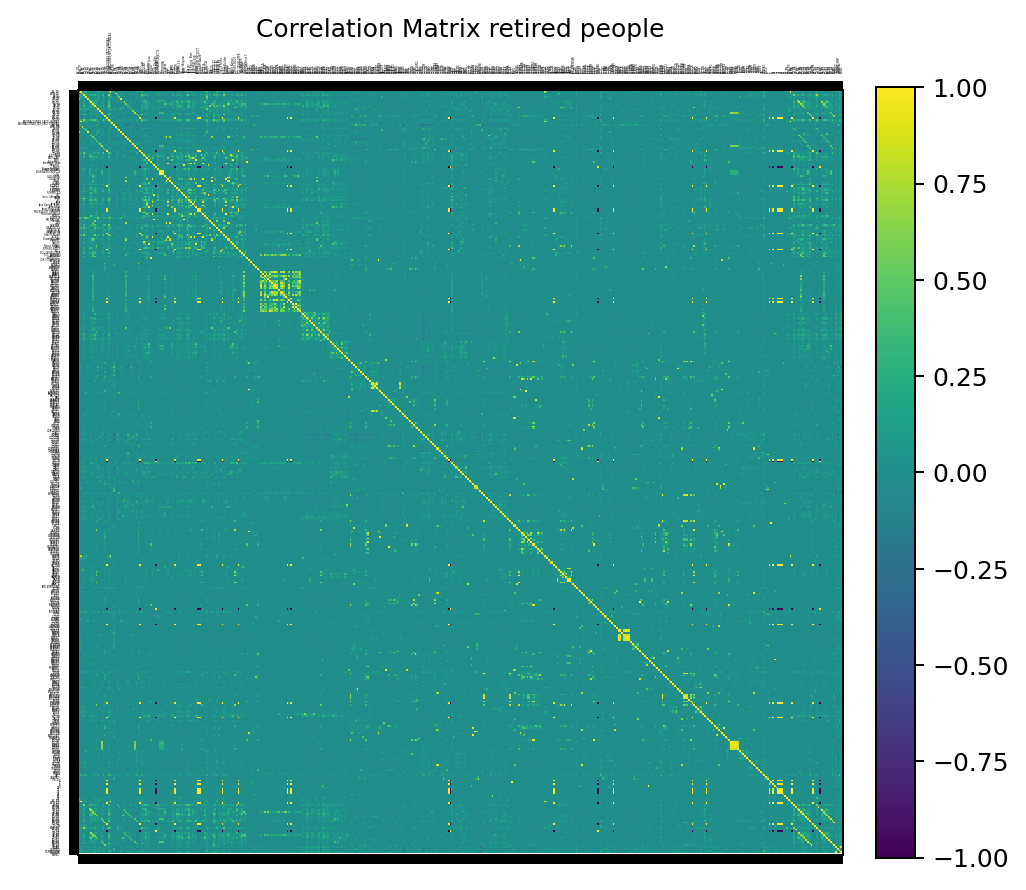

In [56]:
#Correlation complete columns retired
retired_corr = df_retired_scaled.corr()

fig = plt.figure(dpi = 180, figsize = (6, 6))
plt.matshow(retired_corr, fignum = fig.number)
plt.xticks(range(retired_corr.select_dtypes(['number']).shape[1]), retired_corr.select_dtypes(['number']).columns, fontsize = 0.1, rotation = 90)
plt.yticks(range(retired_corr.select_dtypes(['number']).shape[1]), retired_corr.select_dtypes(['number']).columns, fontsize = 0.1)
cb = plt.colorbar(pad = 0.04, fraction = 0.046)
cb.ax.tick_params(labelsize = 10)
plt.title('Correlation Matrix retired people', fontsize = 10)
plt.show()

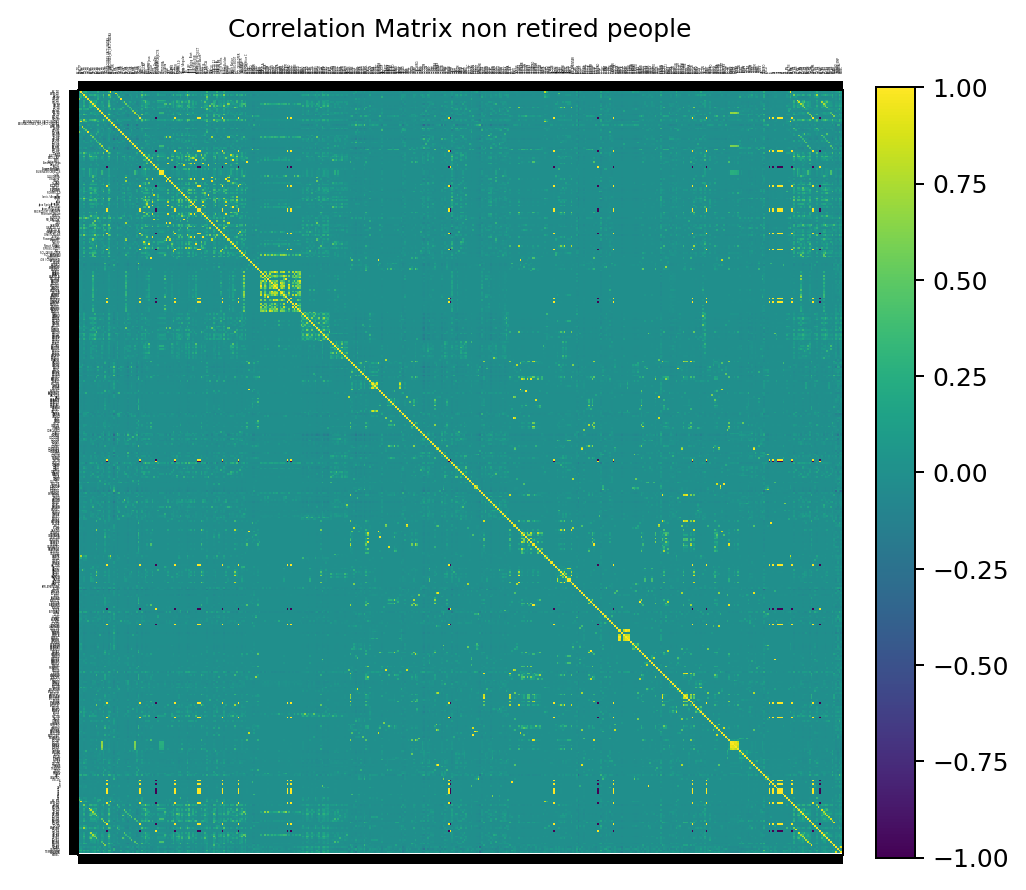

In [57]:
#Correlation complete columns non retired
non_retired_corr = df_non_retired_scaled.corr()

fig = plt.figure(dpi = 180, figsize = (6, 6))
plt.matshow(retired_corr, fignum = fig.number)
plt.xticks(range(non_retired_corr.select_dtypes(['number']).shape[1]), non_retired_corr.select_dtypes(['number']).columns, fontsize = 0.1, rotation = 90)
plt.yticks(range(non_retired_corr.select_dtypes(['number']).shape[1]), non_retired_corr.select_dtypes(['number']).columns, fontsize = 0.1)
cb = plt.colorbar(pad = 0.04, fraction = 0.046)
cb.ax.tick_params(labelsize = 10)
plt.title('Correlation Matrix non retired people', fontsize = 10)
plt.show()

## Datasets saving

In [42]:
# Creating the labels for both datasets 0 for non retired and 1 for retired people
df_retired['LABEL'] = 1
df_non_retired['LABEL'] = 0
print(df_retired['LABEL'].value_counts())
df_non_retired['LABEL'].value_counts()

1    969
Name: LABEL, dtype: int64


0    537
Name: LABEL, dtype: int64

In [43]:
# Suffling the data and merging both datasets retired and non retired
df_merged = pd.concat([df_retired, df_non_retired], join = 'inner', ignore_index = True)
df_merged = df_merged.sample(frac = 1)  #Shuffle the data
df_merged_0 = df_merged.drop(['LAMBDA', 'PERSONA'], axis = 1)
df_merged_0.value_counts()

AC_TP  ADM_TP  AI_TP  AP_TP  CO_TP  CU_TP  HD_TP  IN_TP  NE_TP  OP_TP  PD_TP  PM_TP  PR_TP  SE_TP  SM_TP  SO_TP  TD_TP  ASIGNACIONES_FACTURADAS  ASIGNACIONES_NO_FACTURADAS  AC_HR  ADM_HR  AI_HR  AP_HR    CO_HR  CU_HR  HD_HR  IN_HR  NE_HR  OP_HR    PD_HR  PM_HR   PR_HR  SE_HR  SM_HR   SO_HR  TD_HR  .NET  .NET Core  ANGULAR  AWS  Activemq  Android / Java  Angular  Azure  Azure DevOps  BOOTSTRAP  BUSINESS OBJECTS  C#  C++  CLOUDERA  Cloudera  Cobol  DAX  Drupal  ECLIPSE  EXCEL  FLUTTER  FORMS  FORMS 3.0  GIT  Ionic / Angular  JBPM  JEE  Java  Java JSF  Java Spring  Boot  Javascript  Jboss Fuse-ESB  KOTLIN  MICROSOFT PROJECT  Microsoft Azure  MySQL  NODE JS  NO_APLICA  Next.Js  ODI  ODV  ORACLE  ORACLE 11  ORACLE 8I  ORACLE 9I  ORACLE DB  Oracle Forms  PL/SQL  Power Builder  PowerBI  Python  React  React Native  SAS  SPRING BOOT  SQL  SQL DEVELOPER  SQL SERVER  TABLEAU  WEBLOGIC  iOS / Objetive C  ACTCOM  ADMB  ADMBD  ADMON  ADMSER  ADMSO  ANAID  ANAJU  ANAPC  ANASPLA  ANCAPA  ANCON  ANCOP

In [44]:
df_merged['LABEL']

73      1
179     1
1376    0
619     1
707     1
       ..
1261    0
455     1
1179    0
363     1
511     1
Name: LABEL, Length: 1506, dtype: int64

In [45]:
# Exporting the dataset to csv
# df_merged.to_csv('not_scaled_not_pca_merged.csv')
#df_merged_0.to_csv('not_scaled_not_lambda_merged.csv')

In [58]:
#Correctly standarised the merged dataset
#and the split it 
df_retired_nonretired_scaled.to_csv('standarised_not_pca_merged.csv')

## PCA saving






In [46]:
# Dataframe with the datasets merged to perform PCA
df_merged_1 = pd.concat([df_retired, df_non_retired], join = 'inner', ignore_index = True)
# This dataframe has all the retired people at the start, such that the LABEL column is all 1s until it becomes all 0s
# Check the indices for LABEL

# df_merged_1[df_merged_1['LABEL'] == 0]
# 969 is the first non-1 entry (i.e. the 969th row is where they change )

df_merged_2 = df_merged_1.drop(['LABEL', 'PERSONA'], axis = 1 )
df_merged_scaled = StandardScaler().fit_transform(df_merged_2)
df_merged_scaled = pd.DataFrame(df_merged_scaled, columns = df_merged_2.columns)
df_merged_scaled_1 = df_merged_scaled.drop(['LAMBDA'], axis = 1 )

In [47]:
#Principal Component Analysis PCA
pca = PCA(n_components = 250)
pca_merged = pca.fit(df_merged_scaled_1.T)

print(pca_merged.components_.shape)

# Put the labels back in
df_pca = pd.DataFrame(pca_merged.components_.T) # Transpose back to 250 columns
df_pca['LAMBDA'] = df_merged_scaled['LAMBDA']
df_pca['LABEL'] = df_merged_1['LABEL']

(250, 1506)


In [48]:
#df_pca.head()
df_pca.value_counts()

0          1          2          3          4          5          6          7          8          9          10         11         12         13         14         15         16         17         18         19         20         21         22         23         24         25         26         27         28         29         30         31         32         33         34         35         36         37         38         39         40         41         42         43         44         45         46         47         48         49         50         51         52         53         54         55         56         57         58         59         60         61         62         63         64         65         66         67         68         69         70         71         72         73         74         75         76         77         78         79         80         81         82         83         84         85         86         87         88         89         90        

In [49]:
# Shuffle the data back 
df_pca = df_pca.sample(frac = 1)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,LAMBDA,LABEL
686,0.027279,0.004302,-0.021463,0.029952,-0.006375,0.006381,-0.001432,-0.003007,0.000355,-0.022584,0.012073,0.004047,0.013991,-0.015103,-0.008234,-0.000691,-0.000391,0.002650,-0.004152,0.014756,-0.019663,0.027963,-0.010221,0.011244,0.006955,-0.022186,-0.004771,0.010082,-0.003949,-0.014325,-0.013434,0.065270,0.040139,0.002470,0.070199,0.004548,0.022368,-0.049718,-0.002360,0.028748,...,-0.016225,0.006267,-0.034828,0.005223,0.043244,-0.029736,-0.022558,-0.018001,-0.010241,-0.018142,0.026959,-0.029990,0.002962,0.014228,-0.054814,-0.021218,0.076301,-0.021927,0.001995,-0.030641,-0.015283,0.023541,0.034934,0.001649,0.040433,-0.052769,-0.035297,-0.005894,-0.012767,0.019191,0.018137,-0.016075,0.013987,-0.048147,-0.022600,-0.003369,-0.003813,0.027644,0.586343,1
1462,-0.012592,-0.001403,0.002999,-0.006475,0.008708,0.001754,0.003692,-0.001240,-0.004757,0.001982,0.004788,-0.004311,-0.003099,-0.006054,-0.004661,0.000720,-0.002587,0.000545,-0.002853,-0.011215,0.005058,-0.006965,-0.004152,-0.002592,-0.006852,-0.001262,-0.006428,0.003432,-0.006688,0.003017,0.010554,-0.000112,-0.000118,0.013583,0.014236,0.008308,-0.005527,0.011080,-0.005233,-0.003549,...,-0.010708,-0.020465,-0.004696,0.000729,0.005973,-0.009675,-0.007740,-0.001507,0.010730,-0.007608,0.022892,-0.013470,-0.002006,0.003919,-0.017485,0.049931,-0.016428,0.005811,0.000850,-0.001972,0.003842,-0.007526,-0.024570,0.038392,0.003130,-0.021275,-0.012656,0.057551,-0.025042,0.007499,0.002751,-0.002315,0.012018,-0.014827,-0.002168,-0.017295,-0.004610,0.006597,0.103800,0
778,0.005040,-0.003269,-0.002563,-0.001948,0.004985,-0.016546,-0.008625,0.016642,-0.004373,-0.007604,-0.010265,0.006056,-0.002900,-0.000858,-0.013545,0.001152,0.000141,0.003130,0.001004,0.014587,-0.004123,0.009004,0.003595,0.008170,0.004881,-0.008156,-0.003154,0.001120,0.005318,-0.002648,0.000344,-0.003253,-0.011199,0.000429,-0.006065,-0.002922,-0.006321,0.002931,-0.003712,0.004575,...,0.036984,-0.006493,0.008497,-0.013797,-0.011440,-0.000944,-0.003219,-0.013674,-0.016651,-0.006435,-0.013430,-0.005432,-0.004454,-0.001988,0.014092,0.022836,0.021618,0.007185,0.007513,-0.025859,-0.002088,0.049306,-0.006727,0.020038,0.024230,0.013768,-0.015371,-0.004158,0.006786,0.007129,0.002233,0.012704,0.004351,-0.010898,-0.010756,0.005821,-0.000962,0.008711,-0.248733,1
1464,-0.012461,-0.001592,0.005015,-0.004490,0.005563,0.001096,-0.000093,0.003736,-0.000787,0.002693,-0.001448,0.000795,0.004139,-0.007238,-0.000286,-0.004905,0.000184,-0.001207,-0.000361,-0.005588,0.001967,-0.003462,-0.003721,-0.003978,-0.002693,0.002259,0.000903,0.001187,-0.000733,0.000054,0.009708,0.000618,-0.001731,0.006214,-0.004073,0.007880,0.001405,-0.003249,0.000866,-0.003301,...,0.001014,0.001088,0.002000,-0.006263,0.005817,-0.006522,0.000289,0.000200,-0.002155,-0.004891,-0.002619,-0.001986,0.000187,0.004532,0.002446,-0.005125,0.000261,-0.003095,0.005210,-0.009200,0.004876,-0.003748,-0.005776,-0.001090,-0.003197,-0.003486,-0.000180,-0.000893,0.012736,-0.004727,-0.003183,-0.007053,-0.002956,0.006444,0.002194,0.000869,0.001823,0.004921,-1.062074,0
966,-0.002065,-0.003007,0.007093,-0.003603,0.007454,-0.005309,-0.009316,0.005816,-0.015227,0.020653,-0.002897,0.002912,0.014293,0.014465,0.012717,-0.001971,0.003311,0.006218,-0.003712,-0.000032,0.001076,-0.006944,-0.016876,-0.005517,-0.008294,-0.000064,-0.002600,-0.000225,0.000298,0.000900,0.012375,0.001567,-0.000746,0.008057,-0.002071,0.010017,-0.000179,-0.004829,-0.000377,-0.004383,...,0.003663,0.000989,0.011761,-0.012344,0.010261,-0.001519,0.007023,0.001951,0.004509,-0.002248,0.002801,0.000029,-0.007358,0.013350,0.011022,0.005448,0.005094,0.003904,0.011289,0.006130,-0.004213,-0.012738,-0.002893,0.005593,0.002238,-0.000698,0.002612,-0.009709,-0.003430,-

In [50]:
# Drop nans
df_pca.dropna(inplace = True)

In [51]:
# Save the dataframe as a csv
#df_pca.to_csv('pca_merged_scaled.csv')

## PCA standarised saving

In [61]:
# Dataframe with the datasets merged to perform PCA
df_merged_scaled_3 = df_retired_nonretired_scaled.drop(['LABEL'], axis = 1 )

In [63]:
##Principal Component Analysis PCA
pca = PCA(n_components = 250)
pca_merged = pca.fit(df_merged_scaled_3.T)

print(pca_merged.components_.shape)

# Put the labels back in
df_pca = pd.DataFrame(pca_merged.components_.T) # Transpose back to 250 columns
df_pca['LABEL'] = df_retired_nonretired_scaled['LABEL']

(250, 1506)


In [64]:
#df_pca.head()
df_pca.value_counts()

0          1          2          3          4          5          6          7          8          9          10         11         12         13         14         15         16         17         18         19         20         21         22         23         24         25         26         27         28         29         30         31         32         33         34         35         36         37         38         39         40         41         42         43         44         45         46         47         48         49         50         51         52         53         54         55         56         57         58         59         60         61         62         63         64         65         66         67         68         69         70         71         72         73         74         75         76         77         78         79         80         81         82         83         84         85         86             87         88         89         90    

In [65]:
# Shuffle the data back 
df_pca = df_pca.sample(frac = 1)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,LABEL
52,0.002173,0.001716,-0.021061,0.000720,-0.010720,-0.023021,-0.014812,-0.006131,0.011426,0.009021,-0.018375,-0.001679,0.019945,-0.002583,-0.004780,0.002768,-0.000065,0.001032,0.003126,0.019664,-0.009952,-0.001551,0.000776,0.008954,-0.002771,0.000066,0.012378,0.019983,0.019616,0.003670,-0.000707,-0.028996,-0.035064,-0.003035,-0.033826,0.000922,0.020035,0.016095,0.020431,-0.031847,...,0.029134,-0.013938,0.002114,0.034634,-0.032064,0.014791,-0.041500,-0.030818,-0.001857,-0.037291,-0.039452,0.038843,0.060082,0.020318,0.011862,-0.050294,0.074751,-0.001052,0.014474,0.027643,-0.019202,-0.048338,-0.066586,-0.028958,0.019906,0.018607,-0.021862,-0.052227,-0.004771,-0.024662,0.039370,0.019396,0.013585,-0.026295,-0.004273,-0.051951,-0.004326,-0.024402,0.021800,1
1231,-0.005195,-0.000929,0.002936,-0.004817,0.003539,-0.002596,-0.002070,0.001770,0.001100,-0.002428,-0.001425,0.002430,-0.003667,0.007758,-0.004459,-0.005438,0.001771,0.001866,-0.006047,0.002443,-0.009091,0.013334,-0.004621,-0.003886,-0.001469,0.004443,0.000072,0.008943,0.025966,-0.013559,0.009367,0.009006,0.006243,-0.004863,0.001828,-0.011100,-0.000655,0.004101,-0.002043,0.005604,...,-0.027324,0.003181,0.005233,-0.013815,-0.019358,-0.009985,0.016991,-0.006215,-0.013536,0.026927,-0.010332,0.009446,-0.017978,0.005287,0.002304,0.011706,0.007848,0.014901,-0.026588,0.015308,-0.021073,0.018668,-0.025931,0.001506,-0.025388,0.023444,-0.027548,-0.027304,0.036985,-0.014550,-0.022130,-0.001256,-0.020752,0.000377,0.004983,-0.003888,-0.020009,0.010655,-0.039711,0
640,0.000130,-0.002779,0.001002,-0.002665,-0.010629,-0.007178,-0.008098,0.003339,0.006026,0.005638,-0.009753,0.003890,-0.005816,0.002391,0.004780,-0.005630,0.002842,0.003112,-0.005391,0.003183,0.003988,0.002904,0.005891,-0.002835,0.000343,0.010468,-0.003413,-0.003036,0.001267,-0.005427,0.011775,0.008520,-0.002348,-0.007456,-0.001857,-0.007295,-0.000033,0.008115,-0.004478,0.006363,...,0.002021,0.013229,0.013421,-0.004627,-0.001019,-0.009472,-0.017779,0.004524,-0.003982,0.005743,0.005892,0.009452,-0.001644,0.001206,-0.011085,-0.000386,-0.010093,-0.008454,0.000257,-0.001363,-0.006846,0.018310,-0.011071,-0.006517,0.010688,-0.011632,0.028354,-0.009157,0.014791,0.002947,-0.006524,0.006312,0.007660,-0.002696,-0.020283,0.008208,-0.001418,-0.017295,-0.008378,1
141,-0.013191,-0.001269,0.004372,-0.004111,0.005700,0.001739,0.001768,0.001760,-0.002424,0.000252,0.000755,0.000905,-0.001955,0.004699,0.000888,-0.000758,-0.000202,-0.002061,0.002250,-0.006225,0.003212,-0.005885,-0.003524,-0.003520,-0.000253,-0.003444,-0.004091,-0.003314,-0.013330,0.006313,-0.005369,0.002699,0.000495,0.010325,0.001633,0.004636,-0.001166,-0.002734,0.004872,-0.001605,...,0.004647,-0.005761,0.001812,-0.010149,0.000442,-0.002433,-0.008257,-0.001126,-0.002201,-0.000458,0.004013,-0.002919,0.009931,0.011074,0.009394,-0.008709,-0.002269,0.002166,-0.018191,-0.000857,-0.005166,-0.002715,0.002338,-0.002183,0.005167,0.005126,0.001562,0.003085,0.008495,0.010079,-0.005662,-0.005000,-0.009789,-0.003767,0.005654,0.000256,-0.002148,-0.015892,-0.000414,1
1244,0.011193,0.002374,-0.013989,0.015905,0.012283,-0.003254,-0.006936,0.001417,0.008474,-0.009437,-0.000560,0.005393,0.002874,0.017929,-0.012773,-0.003185,-0.001987,-0.001091,0.000923,0.015524,-0.012288,0.014271,-0.003022,0.005627,0.004196,-0.004053,0.003375,-0.007302,0.020917,0.001947,0.005846,-0.007330,-0.001553,0.006705,0.012862,-0.010215,0.000122,-0.001150,0.009307,-0.010198,...,-0.008110,0.003183,-0.010345,0.007025,-0.002324,0.011908,-0.033462,0.006942,0.041578,0.005400,-0.030306,0.007772,0.015144,-0.016266,-0.004601,-0.020831,-0.018774,-0.026769,0.001299,0.001939,-0.063604,0.027839,0.009423,0.004998,-0.019655,-0.010444,0.057280,-0.019978,-0.030563,0.029940,0

In [66]:
# Drop nans
df_pca.dropna(inplace = True)

In [67]:
# Save the dataframe as a csv
df_pca.to_csv('pca_merged_standarised.csv')